# The Sparks Foundations

### **GRIP-Data Science and Business Analytics -November 2022 [#GRIPNOV22]**



### **Task-6 : Prediction using Decision Tree Algorithm. (Level - Intermediate)**

### Name : SREEDEVI KATTOOR
Problem Statement :

1.Create the decision tree classifier and visualize it graphically.

2.To check that if we feed any new data to this classifier,it would be able to predict right class accordingly

In [143]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
# for EDA
import seaborn as sns
import matplotlib.pyplot as plt  
#TO IGNORE WARNINGS
import warnings as wg
wg.filterwarnings("ignore")

#import Decision Tree classifier library from sklearn
from sklearn.tree import DecisionTreeClassifier

In [144]:
#IMPORTING DATA FILE
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\GRIP\Iris.csv")

In [145]:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [146]:
#To find rows and columns
df.shape

(150, 6)

In [147]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [148]:
#CHECK DATATYPES
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [149]:
#CHECK MISSING VALUES
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There is no null value in the given data set

In [150]:
#CHECK UNIQUE ENTRIES IN SPECIES COLUMN
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [151]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [153]:
#DROP ID COLUMN
Iris=pd.DataFrame(df)
Iris=Iris.drop(columns=["Id"])
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
IrisFreq = pd.crosstab(index=Iris["Species"],  columns="count")      
IrisFreq

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


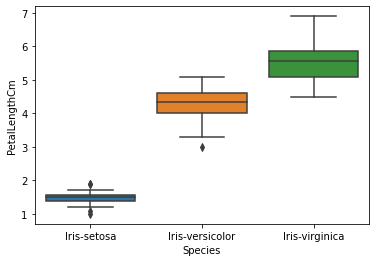

In [155]:
#CHECK OUTLIERS
sns.boxplot(x="Species",y="PetalLengthCm",data=Iris)
plt.show()

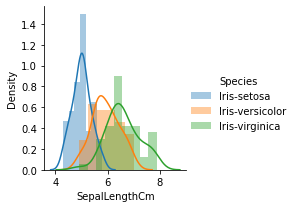

In [156]:
#CHECK THE DISTRIBUTION OF SEPAL LENGTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

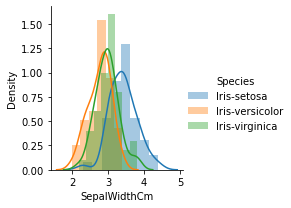

In [157]:
#CHECK THE DISTRIBUTION OF SEPAL WIDTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

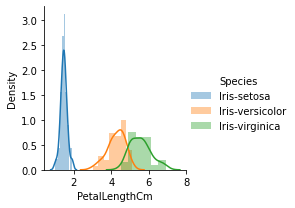

In [158]:
#CHECK THE DISTRIBUTION OF PETALLENGTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

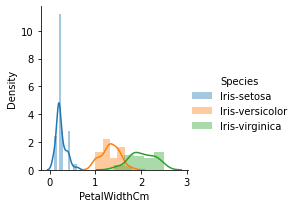

In [159]:
#CHECK THE DISTRIBUTION OF PETAL WIDTH
sns.FacetGrid(Iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

In [160]:
#Print correlation plot of numeric columns
#Check the correlation of numeric variables
df_numeric=Iris.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [161]:
#correlation matrix
corr_matrix=df_numeric.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### plot correlations on a heatmap

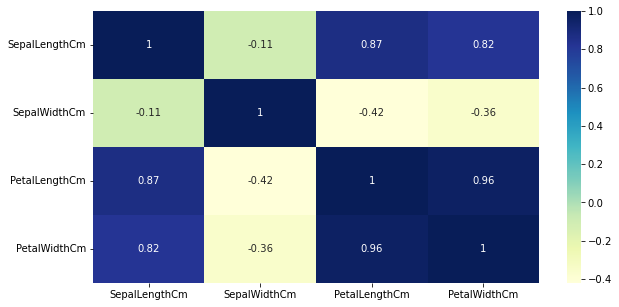

In [162]:


#figure size
plt.figure(figsize=(10,5))

#heatmap
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)
plt.show()

### Splitting data into train and test data

In [163]:
X=df.iloc[:,1:5].values
y=df.iloc[:,-1].values

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

### Decision Tree Model Training

In [165]:
# Create model object
dtree=DecisionTreeClassifier(max_depth=5)


In [166]:
# Fit the training model
model=dtree.fit(X_train,y_train)



In [167]:
# Test the accuracy of training model
dtree.score(X_train,y_train)


1.0

In [168]:
# Test the model using xtest
y_pred=model.predict(X_test)

### Implementing Decision Tree Classifier

In [169]:
# import  Tree classifier library from sklearn
from sklearn import tree
classifier_tree=tree.DecisionTreeClassifier()
classifier_tree=classifier_tree.fit(X_train,y_train)

## Visualizing the Decision Tree.

[Text(0.3333333333333333, 0.9166666666666666, 'PetalLengthCm <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [38, 34, 33]\nclass = Iris-setosa'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.75, 'PetalLengthCm <= 4.8\ngini = 0.5\nsamples = 67\nvalue = [0, 34, 33]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(0.6666666666666666, 0.5833333333333334, 'PetalWidthCm <= 1.7\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]\nclass = Iris-virginica'),
 Text(0.5, 0.4166666666666667, 'SepalWidthCm <= 2.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.6666666666666666, 0.25, 'SepalLengthCm <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.5, 0.0833333

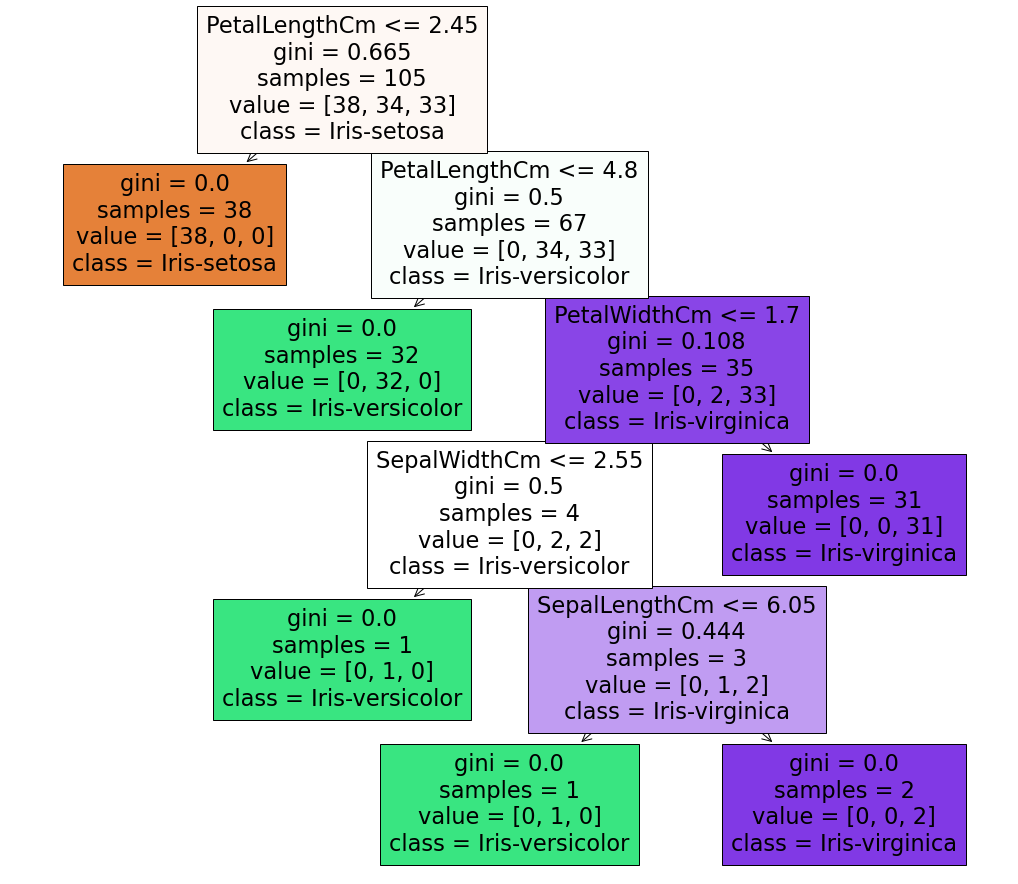

In [170]:
# Decision tree plot
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
from sklearn.tree import plot_tree
plt.figure(figsize=(18,16))
#tree.plot_tree(classifier_tree,filled=True,impurity=True)

tree.plot_tree(classifier_tree,feature_names=features,class_names=targets,filled=True,impurity=True)